In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [3]:
data.Name.unique()

array(['AAPL'], dtype=object)

In [4]:
data2=data.drop(columns=["High", "Low","Close","Volume", "Name"])

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.3+ KB


In [6]:
data2["Date"]=pd.to_datetime(data2["Date"], format="%Y-%m-%d")
data2.head()

,Date,Open
0,2006-01-03,10.34
1,2006-01-04,10.73
2,2006-01-05,10.69
3,2006-01-06,10.75
4,2006-01-09,10.96


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3019 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.3 KB


In [8]:
data2.rename({"Date":"ds", "Open":"y"}, axis=1, inplace=True)

In [9]:
data2

,ds,y
0,2006-01-03,10.34
1,2006-01-04,10.73
2,2006-01-05,10.69
3,2006-01-06,10.75
4,2006-01-09,10.96
...,...,...
3014,2017-12-22,174.68
3015,2017-12-26,170.80
3016,2017-12-27,170.10
3017,2017-12-28,171.00


In [11]:
m=Prophet(daily_seasonality=True)
m.fit(data2)

In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3379,2018-12-25
3380,2018-12-26
3381,2018-12-27
3382,2018-12-28
3383,2018-12-29


In [13]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3379,2018-12-25,178.946955,154.399056,200.200330,158.194801,199.250718,-1.398780,-1.398780,-1.398780,-0.752544,-0.752544,-0.752544,-0.041985,-0.041985,-0.041985,-0.604251,-0.604251,-0.604251,0.0,0.0,0.0,177.548175
3380,2018-12-26,179.010973,154.769056,200.146745,158.176875,199.426621,-1.424729,-1.424729,-1.424729,-0.752544,-0.752544,-0.752544,0.024000,0.024000,0.024000,-0.696185,-0.696185,-0.696185,0.0,0.0,0.0,177.586243
3381,2018-12-27,179.074990,156.897363,199.109410,158.202597,199.598488,-1.502667,-1.502667,-1.502667,-0.752544,-0.752544,-0.752544,0.031775,0.031775,0.031775,-0.781898,-0.781898,-0.781898,0.0,0.0,0.0,177.572323
3382,2018-12-28,179.139007,155.408604,200.363748,158.228318,199.769999,-1.714687,-1.714687,-1.714687,-0.752544,-0.752544,-0.752544,-0.099860,-0.099860,-0.099860,-0.862283,-0.862283,-0.862283,0.0,0.0,0.0,177.424320
3383,2018-12-29,179.203025,153.838663,201.042242,158.255892,199.950897,-1.596950,-1.596950,-1.596950,-0.752544,-0.752544,-0.752544,0.094068,0.094068,0.094068,-0.938474,-0.938474,-0.938474,0.0,0.0,0.0,177.606075


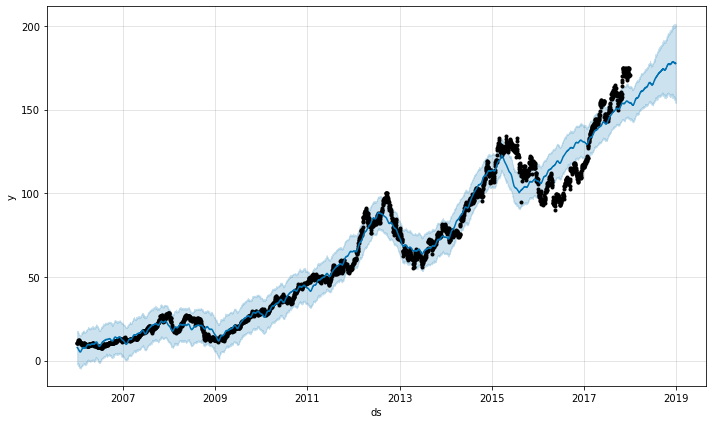

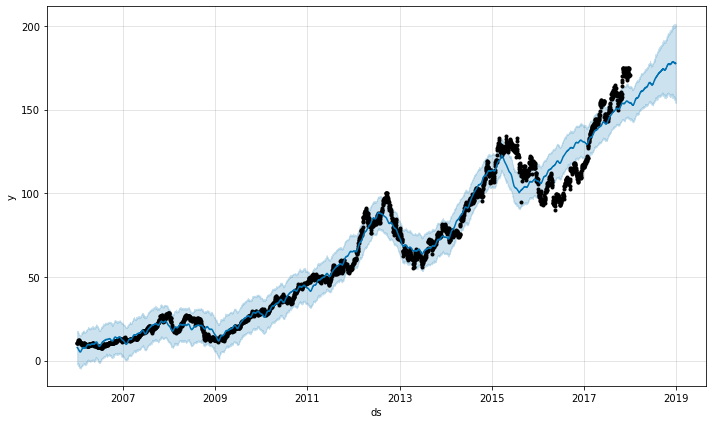

In [14]:
m.plot(forecast)

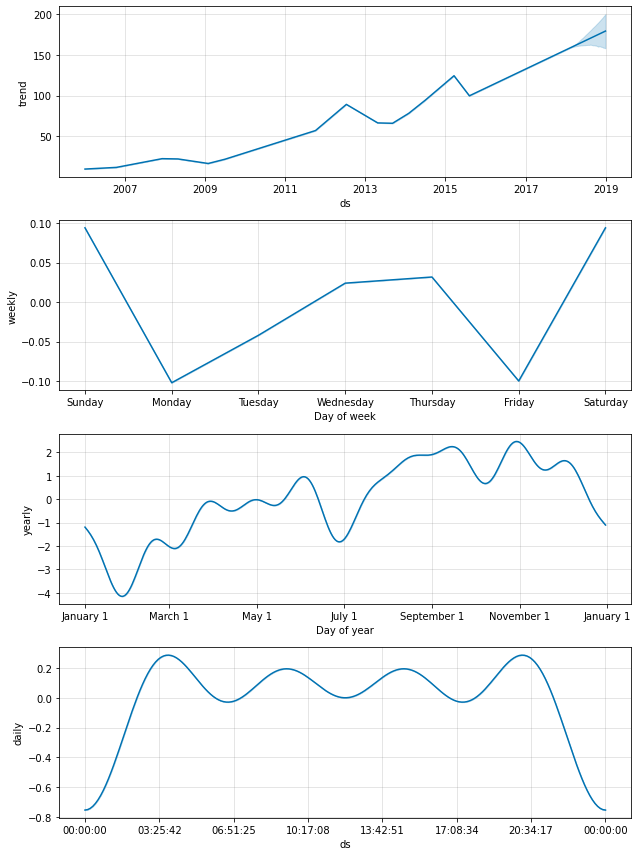

In [15]:
fig2 = m.plot_components(forecast)